<a href="https://colab.research.google.com/github/shahinmabdulla/shahinfdp/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/FDPAISETML')

In [3]:
pwd

'/content/drive/MyDrive/FDPAISETML'

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
tf.random.set_seed(42)

In [7]:
import numpy as np

In [8]:
np.random.seed(42)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#display images on same screen
import glob
#to take files from drive
import PIL
from PIL import Image


In [10]:
!unzip '/content/drive/MyDrive/fdpdataset/Flower_dataset.zip' -d  '/content/drive/MyDrive/FDPAISETML'

Archive:  /content/drive/MyDrive/fdpdataset/Flower_dataset.zip
replace /content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
imgFiles= glob.glob("/content/drive/MyDrive/FDPAISETML/tiny_FR/*/*.jpg")

In [12]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/FDPAISETML/tiny_FR/daisy/11642632_1e7627a2cc.jpg


In [13]:
print(len(imgFiles))

500


In [14]:

x=[]
y=[]
for fName in imgFiles:
  #prepare the dataset and populate Xand Y
  x_i=Image.open(fName)
  x_i=x_i.resize((299,299))
  x_i=np.array(x_i)/255  
  x.append(x_i)
  label=fName.split("/")
  y_i=label[6]
  y.append(y_i)

In [15]:
print(set(y))

{'daisy', 'tulip', 'dandelion', 'rose', 'sunflower'}


In [16]:
from sklearn.preprocessing import  LabelEncoder
# to label classes
lEncoder=LabelEncoder()
y=lEncoder.fit_transform(y)# to set different random numbers to each class
print(y)
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [17]:
print(lEncoder.classes_)#to find which number corresponds to which data

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [19]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)


(500, 299, 299, 3)
(500,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print("x_train_shape:{}".format(x_train.shape))
print("x_test_shape:{}".format(x_train.shape))

x_train_shape:(400, 299, 299, 3)
x_test_shape:(400, 299, 299, 3)


In [24]:
#manual standard scale the data
#find mean and stan deviation of vtrain data and apply to test data
mu=x_train.mean()
std=x_train.std()
x_train_std=(x_train-mu)/std#apply feature scaling to x train
x_test_std=(x_test-mu)/std#apply feature scaling to y train


In [26]:
# Create the network using Functional API metho
input_ = keras.layers.Input(shape = x_train.shape[1:])
# Construct the convolution based preprocessing part (feature extractor) 
x = keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_)#note input attached to end
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

# Construct the DNN classifier part

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1000, activation='relu')(x)
x = keras.layers.Dense(units=100, activation='relu')(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_CNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [27]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

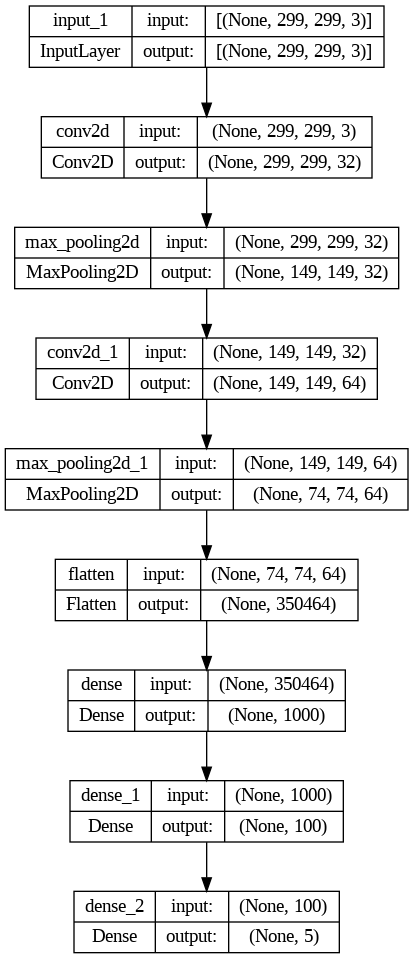

In [31]:
#visualisation of model
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [32]:
# Compile the network with appropriate settings for loss, optimizer and metrics.
model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#Training the model. #history_CNN is a dictionary in which loss and accuracy is stored
history_CNN = model_CNN.fit(x=x_train_std, 
                            y=y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=32)

#history_cnn (dictionary) captures the loss and accuracy in ech epoch and stores 

Epoch 1/25
12/12 [==============================] - 3s 220ms/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 5.8669 - val_accuracy: 0.3500
Epoch 2/25
12/12 [==============================] - 2s 173ms/step - loss: 0.1098 - accuracy: 0.9722 - val_loss: 2.5401 - val_accuracy: 0.4500
Epoch 3/25
12/12 [==============================] - 2s 167ms/step - loss: 0.0487 - accuracy: 0.9806 - val_loss: 1.7154 - val_accuracy: 0.5000
Epoch 4/25
12/12 [==============================] - 2s 169ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.8785 - val_accuracy: 0.4250
Epoch 5/25
12/12 [==============================] - 2s 169ms/step - loss: 6.2604e-04 - accuracy: 1.0000 - val_loss: 2.7509 - val_accuracy: 0.5500
Epoch 6/25
12/12 [==============================] - 2s 169ms/step - loss: 1.5107e-04 - accuracy: 1.0000 - val_loss: 2.7366 - val_accuracy: 0.6000
Epoch 7/25
12/12 [==============================] - 2s 170ms/step - loss: 5.4056e-05 - accuracy: 1.0000 - val_loss: 2.9393 - val_accuracy: 0

In [33]:
history_CNN.history.items()

dict_items([('loss', [0.040731627494096756, 0.10978462547063828, 0.04869787395000458, 0.00786349456757307, 0.0006260377704165876, 0.00015107171202544123, 5.405550837167539e-05, 2.513789149816148e-05, 1.9047671230509877e-05, 1.2899175999336876e-05, 1.0474916052771732e-05, 7.961579285620246e-06, 6.511695119115757e-06, 5.557471467909636e-06, 5.881967354071094e-06, 4.436323706613621e-06, 4.065242137585301e-06, 3.663324605440721e-06, 3.2697009828552837e-06, 2.8108472633903148e-06, 2.539682782298769e-06, 2.3052712094795424e-06, 2.1135654151294148e-06, 1.9215249267290346e-06, 1.79205926542636e-06]), ('accuracy', [0.9833333492279053, 0.9722222089767456, 0.980555534362793, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ('val_loss', [5.8668951988220215, 2.5400631427764893, 1.7153873443603516, 2.8785336017608643, 2.7509241104125977, 2.736631393432617, 2.9392619132995605, 3.020925521850586, 3.0659189224243164, 3.0713114738464355, 3.0

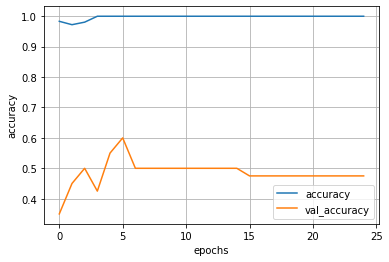

In [34]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [36]:
#Evaluate the model
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(x_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 0s 86ms/step - loss: 3.7407 - accuracy: 0.4800
Test-loss: 3.740728, Test-accuracy: 0.480000


In [38]:
cProba = model_CNN.predict(x_test_std[:10])

print(cProba)

1/1 [==============================] - 0s 325ms/step
[[9.7912461e-01 2.7268610e-05 6.9480797e-05 2.0356899e-02 4.2166695e-04]
 [7.2273219e-01 2.0483710e-01 7.0350051e-02 2.0390505e-03 4.1599902e-05]
 [1.2839202e-21 1.3733187e-25 8.6737638e-03 1.1641198e-19 9.9132627e-01]
 [1.1618540e-04 9.1195367e-03 6.1581510e-01 2.2994379e-06 3.7494689e-01]
 [6.9583368e-01 3.0201218e-01 6.4375357e-08 2.1539882e-03 1.1479716e-07]
 [3.5002280e-02 7.6787814e-02 2.0196219e-01 5.3471092e-02 6.3277662e-01]
 [7.2229587e-09 9.1414464e-01 2.4163465e-11 8.5854851e-02 5.5899937e-07]
 [3.1839125e-11 1.1429023e-11 9.8630929e-01 3.8336280e-16 1.3690649e-02]
 [3.9300130e-04 9.4744766e-01 1.3127963e-08 5.2158296e-02 1.0347378e-06]
 [9.4619298e-07 1.5665526e-05 9.7097045e-01 7.2203257e-11 2.9012877e-02]]


In [1]:
#cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

NameError: ignored